In [4]:
#ingresamos las bibliotecas que utilizaremos.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#Series de tiempo y pronósticos.
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#Resumen de la ACT 5.
url = 'https://raw.githubusercontent.com/MarioMtzC99/FisicaComputacional1/main/Actividad1/DatosClimatolog%C3%ADaPitiquito.txt'
mis_columnas = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_carac = pd.read_csv(url, names=mis_columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
df_work = df_carac.copy()
str_Nulo = 'Nulo'
df_trabajo = df_work.replace(to_replace=str_Nulo, value='', regex=True)
columnas_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for columnas in columnas_list:
  df_trabajo[columnas] = pd.to_numeric(df_trabajo[columnas], errors='coerce')
df_paso4 = df_trabajo.copy()
df_paso4['Fecha']=pd.to_datetime(df_paso4['Fecha'], dayfirst=True).copy()
df_paso4['Año'] = df_paso4['Fecha'].dt.year
#Como la columna mes la queremos con el nombre abreviado del mes, por lo que utilizamos la
#función df.dt.strftime('%b')
df_paso4['Mes'] = df_paso4['Fecha'].dt.strftime('%b')
df_A5_ts = df_paso4.copy()
#Reemplazamos el índice por la variable 'Fecha'
df_A5_ts = df_A5_ts.set_index('Fecha')
df_94 = df_A5_ts[(df_A5_ts['Año'] >= 1994) & (df_A5_ts['Año'] < 2015)]

In [6]:
#Probamos la estacionaridad de la serie de tiempo.
def test_stationarity(df_ts):
  #Estadística de promedios móviles
  rolmean = df_ts.rolling(window=365, center=True).mean()
  rolstd = df_ts.rolling(window=365, center=True).std()
  #Tamaño de la figura 
  plt.rcParams['figure.figsize'] = (12,6)
  #Grafica de promedios moviles.
  plt.plot(df_ts, color='green',label='Original')
  plt.plot(rolmean,color='black', label='Promedio Móvil')
  plt.plot(rolstd, color='yellow', label='Desviación estándar móvil')
  plt.legend(loc='best')
  plt.title('Promedio Móvil y Desviación Estándar')
  plt.grid()
  plt.show()
  #Prueba aumentada de Dickey-Fuller:
  print('Resultados Dickey-Fuller:')
  dftest = adfuller(df_ts,autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Estadístico','Valor P', '#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Valor Crítico (%s)'%key] = value
    print(dfoutput)


# **Actividad 1.**
Tomar una serie de datos en un periodo sin huecos (Tmax, Tmin) de la estación que se está analizando, para probar si es una serie de tiempo estacionaria o hacer las transformaciones para convertirla en una. Ver el ejemplo mostrado en la Jupyter Notebook de esta actividad para realizar las acciones similares.

In [7]:
#Fechas de inicio y fin.
start, end = '1997-01', '2001-01'
Periodo_prueba = df_94.loc[start:end].copy()
Periodo_prueba.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1997-01-01,0.0,3.4,25.5,7.0,1997,Jan
1997-01-02,0.0,2.8,27.5,8.0,1997,Jan
1997-01-03,0.0,4.3,29.0,10.5,1997,Jan
1997-01-04,0.0,3.4,23.5,9.0,1997,Jan
1997-01-05,0.5,3.4,22.5,5.5,1997,Jan


In [8]:
#Ecnabezado
Periodo_prueba['Tmax'].head()

Fecha
1997-01-01    25.5
1997-01-02    27.5
1997-01-03    29.0
1997-01-04    23.5
1997-01-05    22.5
Name: Tmax, dtype: float64

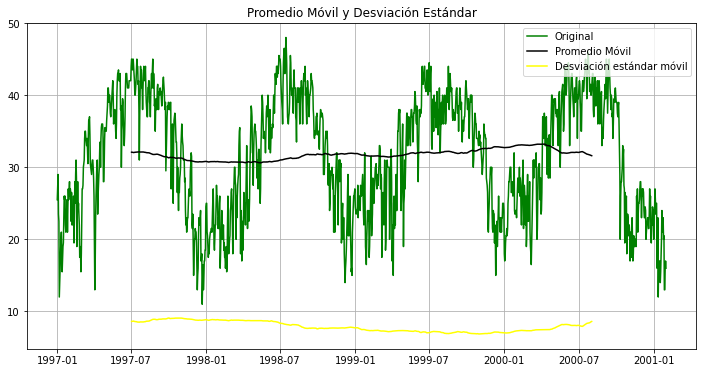

Resultados Dickey-Fuller:
Test Estadístico                 -2.354001
Valor P                           0.155142
#Lags Used                       17.000000
Number of Observations Used    1474.000000
Valor Crítico (1%)               -3.434794
dtype: float64
Test Estadístico                 -2.354001
Valor P                           0.155142
#Lags Used                       17.000000
Number of Observations Used    1474.000000
Valor Crítico (1%)               -3.434794
Valor Crítico (5%)               -2.863503
dtype: float64
Test Estadístico                 -2.354001
Valor P                           0.155142
#Lags Used                       17.000000
Number of Observations Used    1474.000000
Valor Crítico (1%)               -3.434794
Valor Crítico (5%)               -2.863503
Valor Crítico (10%)              -2.567815
dtype: float64


In [9]:
#Serie de tiempo Tmax y estacionaridad.
Periodo_prueba = Periodo_prueba['Tmax'].copy()
test_stationarity(Periodo_prueba)

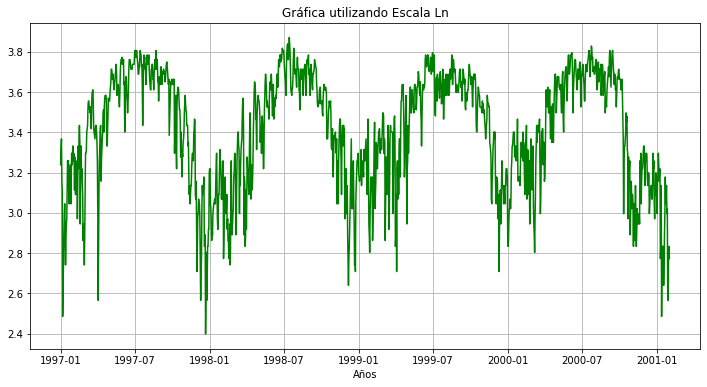

In [10]:
#Usamos Log para ajustar un mejor la gráfica
Periodo_prueba_ln = np.log(Periodo_prueba)
plt.plot(Periodo_prueba_ln, color='green')
plt.xlabel('Años',color='black')
plt.title('Gráfica utilizando Escala Ln')
plt.grid()
plt.show();

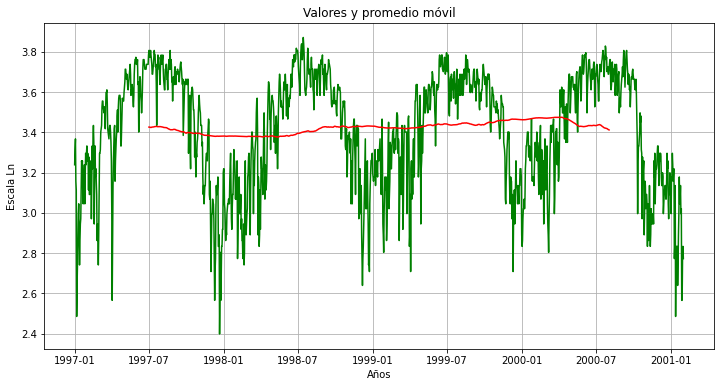

In [11]:
#Promedio móvil a 365 días para la observacion de la tendencia.
Promedio_movil = Periodo_prueba_ln.rolling(365, center=True).mean()
plt.plot(Periodo_prueba_ln, color='green')
plt.plot(Promedio_movil, color='red')
plt.xlabel('Años', color='black')
plt.ylabel('Escala Ln', color = 'black')
plt.title('Valores y promedio móvil')
plt.grid()
plt.show()

LA TENDENCIA AUN ES MUY VARIABLE

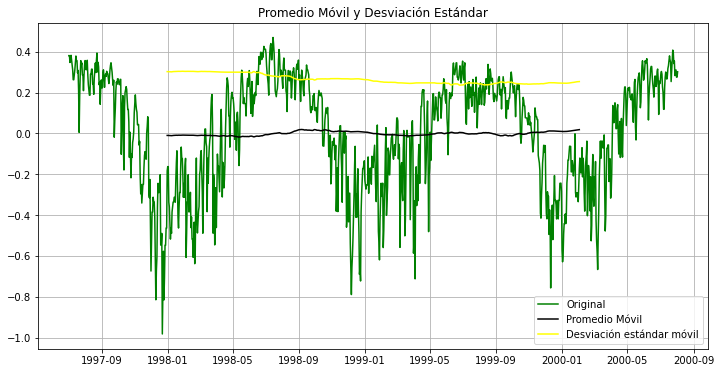

Resultados Dickey-Fuller:
Test Estadístico                 -2.316350
Valor P                           0.166749
#Lags Used                       14.000000
Number of Observations Used    1113.000000
Valor Crítico (1%)               -3.436239
dtype: float64
Test Estadístico                 -2.316350
Valor P                           0.166749
#Lags Used                       14.000000
Number of Observations Used    1113.000000
Valor Crítico (1%)               -3.436239
Valor Crítico (5%)               -2.864140
dtype: float64
Test Estadístico                 -2.316350
Valor P                           0.166749
#Lags Used                       14.000000
Number of Observations Used    1113.000000
Valor Crítico (1%)               -3.436239
Valor Crítico (5%)               -2.864140
Valor Crítico (10%)              -2.568154
dtype: float64


In [12]:
Periodo_prueba_ln_moving_ave_diff = Periodo_prueba_ln - Promedio_movil
Periodo_prueba_ln_moving_ave_diff.dropna(inplace=True)
#Estacionaridad para la serie de tiempo en Log.
test_stationarity(Periodo_prueba_ln_moving_ave_diff)

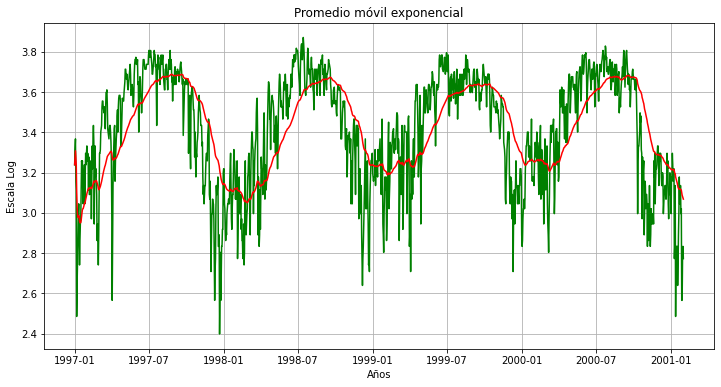

In [13]:
#No observamos una serie estacionaria. El promedio movil lo haremos exponencial también.
EWM_avg = Periodo_prueba_ln.ewm(halflife=30).mean()#30 DÍAS
plt.plot(Periodo_prueba_ln, color='green')
plt.plot(EWM_avg, color = 'red')
plt.xlabel('Años', color='black')
plt.ylabel('Escala Log', color='black')
plt.title('Promedio móvil exponencial')
plt.grid()
plt.show()

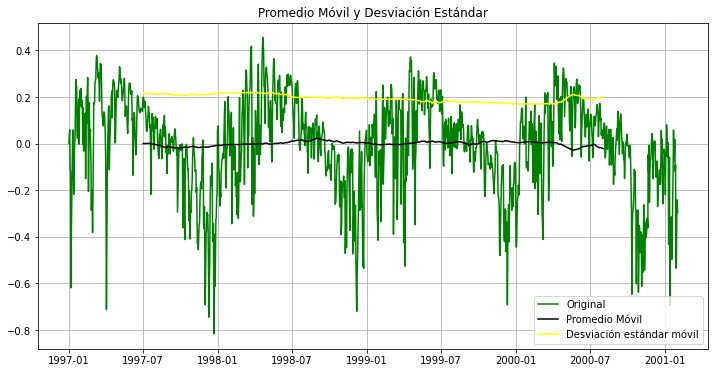

Resultados Dickey-Fuller:
Test Estadístico                 -3.578790
Valor P                           0.006180
#Lags Used                       18.000000
Number of Observations Used    1473.000000
Valor Crítico (1%)               -3.434797
dtype: float64
Test Estadístico                 -3.578790
Valor P                           0.006180
#Lags Used                       18.000000
Number of Observations Used    1473.000000
Valor Crítico (1%)               -3.434797
Valor Crítico (5%)               -2.863504
dtype: float64
Test Estadístico                 -3.578790
Valor P                           0.006180
#Lags Used                       18.000000
Number of Observations Used    1473.000000
Valor Crítico (1%)               -3.434797
Valor Crítico (5%)               -2.863504
Valor Crítico (10%)              -2.567816
dtype: float64


In [14]:
#Estacionaridad de la diferencia.
Periodo_prueba_ln_EWM_avg_diff = Periodo_prueba_ln - EWM_avg
test_stationarity(Periodo_prueba_ln_EWM_avg_diff)

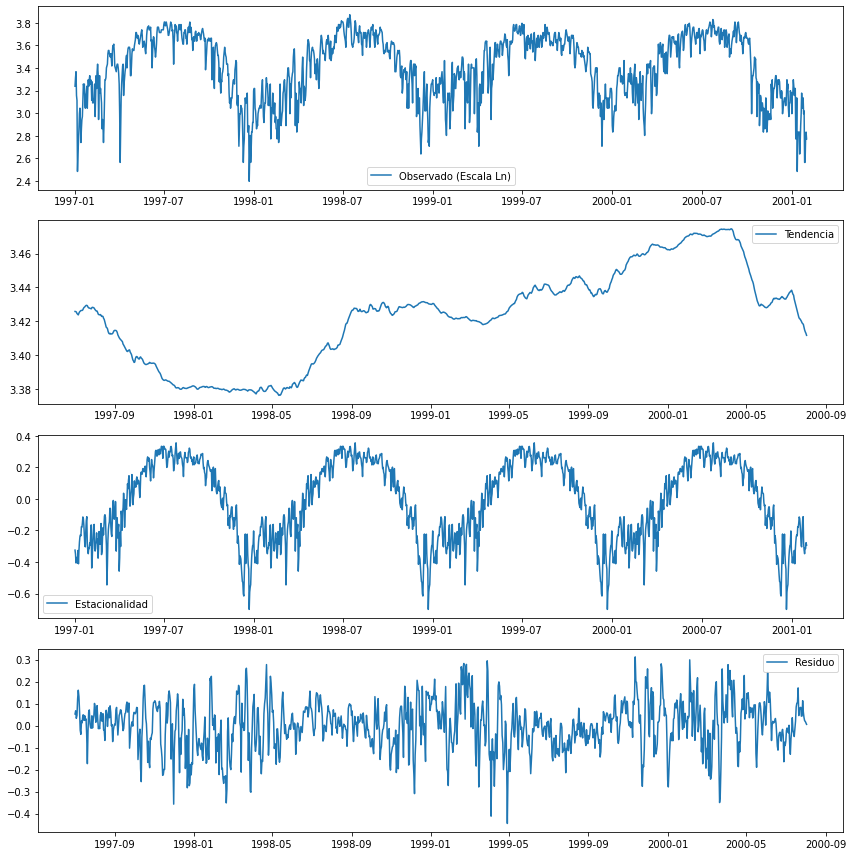

In [15]:
#Una vez tenemos un valor P más o menos aceptable. Veremos la estacionalidad po rel metodo de descomposicion.
decomposicion = sm.tsa.seasonal_decompose(Periodo_prueba_ln.interpolate(), model='additive', freq=365)
Tendencia = decomposicion.trend
Estacionalidad = decomposicion.seasonal
residuo = decomposicion.resid
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(411)
plt.plot(Periodo_prueba_ln, label='Observado (Escala Ln)')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(Tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(Estacionalidad, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Residuo')
plt.legend(loc='best')

plt.tight_layout();

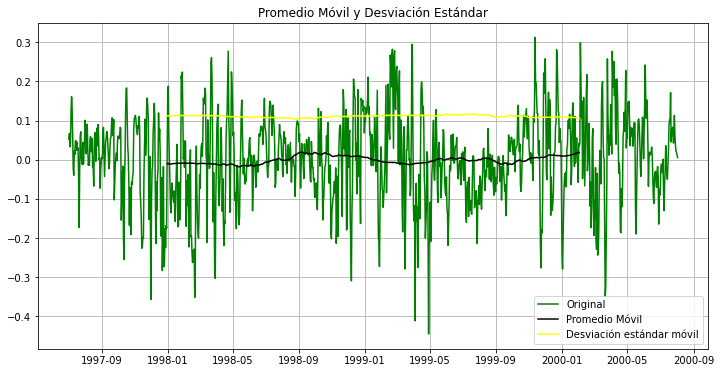

Resultados Dickey-Fuller:
Test Estadístico              -6.349445e+00
Valor P                        2.632977e-08
#Lags Used                     1.900000e+01
Number of Observations Used    1.108000e+03
Valor Crítico (1%)            -3.436266e+00
dtype: float64
Test Estadístico              -6.349445e+00
Valor P                        2.632977e-08
#Lags Used                     1.900000e+01
Number of Observations Used    1.108000e+03
Valor Crítico (1%)            -3.436266e+00
Valor Crítico (5%)            -2.864152e+00
dtype: float64
Test Estadístico              -6.349445e+00
Valor P                        2.632977e-08
#Lags Used                     1.900000e+01
Number of Observations Used    1.108000e+03
Valor Crítico (1%)            -3.436266e+00
Valor Crítico (5%)            -2.864152e+00
Valor Crítico (10%)           -2.568161e+00
dtype: float64


In [16]:
#Eliminando la tendencia y estacionalidad. Usando el residuo.
#¿Es estacionario?
Periodo_prueba_decompose = residuo
Periodo_prueba_decompose.dropna(inplace=True)
test_stationarity(Periodo_prueba_decompose)

# **Actividad 2. **
Construye los modelos ARIMA para cada Temperatura (Tmax y Tmin), y contrasta la bondad del ajuste en cada caso, calculando el error de la raíz cuadrada promedio RMSE y sobreponiendo gráficamente ambas series, la observada y la construida con el método ARIMA.

Vamos a utilizar el método ARIMA. Para esto requerimos dos valores q y p, los cuales obtenemos como sigue.

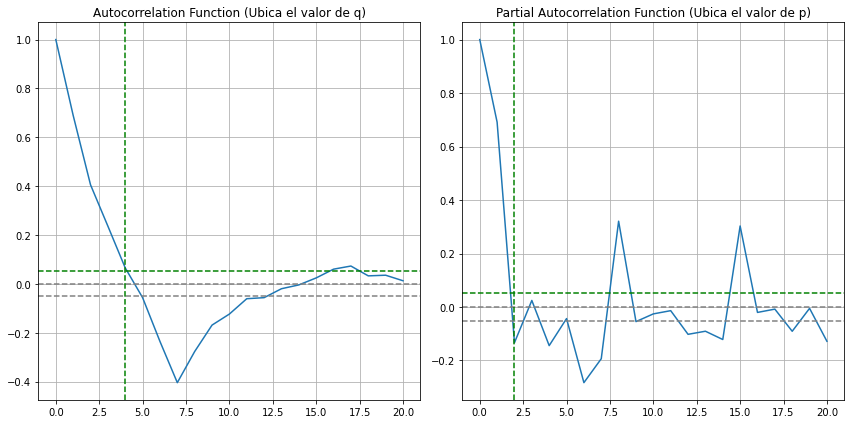

In [17]:
# Diferenciamos usando la función df.shift()
Periodo_prueba_ln_diff = Periodo_prueba_ln - Periodo_prueba_ln.shift(periods=7)
Periodo_prueba_ln_diff.dropna(inplace=True)

lag_acf = acf(Periodo_prueba_ln_diff, nlags=20)
lag_pacf = pacf(Periodo_prueba_ln_diff, nlags=20, method = 'ols')

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Periodo_prueba_ln_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Periodo_prueba_ln_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias
#plt.axvline(x=3, linestyle='--', color='green')
plt.axvline(x=4, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Periodo_prueba_ln_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Periodo_prueba_ln_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

Utilizamos el moderlo AR.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 1491
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1204.430
Method:                       css-mle   S.D. of innovations              0.108
Date:                Fri, 05 Mar 2021   AIC                          -2400.860
Time:                        20:01:51   BIC                          -2379.631
Sample:                    01-02-1997   HQIC                         -2392.949
                         - 01-31-2001                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0003      0.002     -0.149      0.882      -0.005       0.004
ar.L1.D.Tmax    -0.0848      0.025     -3.336      0.001      -0.135      -0.035
ar.L2.D.Tmax    -0.1896      0.025     -7.45

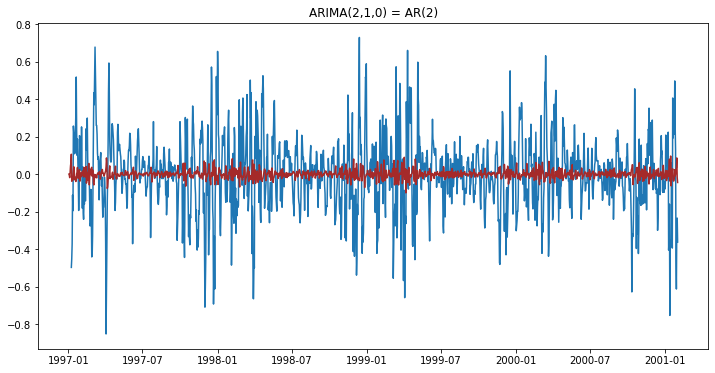

In [18]:
model = ARIMA(Periodo_prueba_ln, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(Periodo_prueba_ln_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

Modelo MA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 1491
Model:                 ARIMA(0, 1, 4)   Log Likelihood                1248.620
Method:                       css-mle   S.D. of innovations              0.105
Date:                Fri, 05 Mar 2021   AIC                          -2485.240
Time:                        20:01:52   BIC                          -2453.397
Sample:                    01-02-1997   HQIC                         -2473.374
                         - 01-31-2001                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.001     -0.201      0.840      -0.002       0.002
ma.L1.D.Tmax    -0.1565      0.026     -6.048      0.000      -0.207      -0.106
ma.L2.D.Tmax    -0.2696      0.025    -10.61

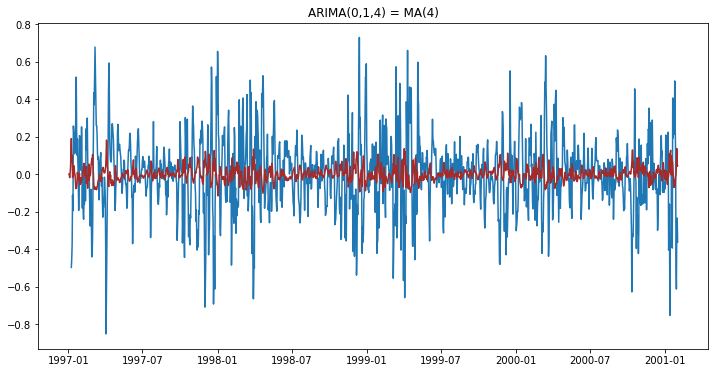

In [19]:
 #Modelo MA(q): (p,d,q) = (0,1,4) 
model = ARIMA(Periodo_prueba_ln, order=(0,1,4), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(Periodo_prueba_ln_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,4) = MA(4)')
print(results_MA.summary())

MODERLO ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 1491
Model:                 ARIMA(2, 1, 4)   Log Likelihood                1258.059
Method:                       css-mle   S.D. of innovations              0.104
Date:                Fri, 05 Mar 2021   AIC                          -2500.119
Time:                        20:01:55   BIC                          -2457.661
Sample:                    01-02-1997   HQIC                         -2484.297
                         - 01-31-2001                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.001     -0.203      0.840      -0.002       0.001
ar.L1.D.Tmax    -0.2854      0.081     -3.527      0.000      -0.444      -0.127
ar.L2.D.Tmax     0.4944      0.076      6.46

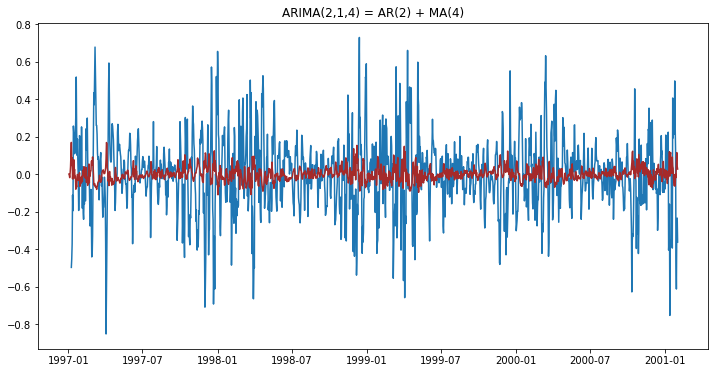

In [20]:
model = ARIMA(Periodo_prueba_ln, order=(2,1,4), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(Periodo_prueba_ln_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(4)')
print(results_ARIMA.summary())

In [21]:
predicciones_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predicciones_ARIMA_diff)

Fecha
1997-01-02   -0.000166
1997-01-03   -0.005597
1997-01-04   -0.019167
1997-01-05    0.004197
1997-01-06    0.036049
                ...   
2001-01-27   -0.019097
2001-01-28    0.066315
2001-01-29    0.114399
2001-01-30    0.041557
2001-01-31    0.026602
Length: 1491, dtype: float64


In [22]:
#Sumatoria de predicciones ARIMA a serie observada.
predicciones_ARIMA_ln = pd.Series(Periodo_prueba_ln, index = Periodo_prueba_ln.index)
predicciones_ARIMA_ln = predicciones_ARIMA_ln.add(predicciones_ARIMA_diff)
print(predicciones_ARIMA_ln.head())
print(predicciones_ARIMA_ln.tail())

Fecha
1997-01-01         NaN
1997-01-02    3.314020
1997-01-03    3.361699
1997-01-04    3.137834
1997-01-05    3.117712
dtype: float64
Fecha
2001-01-27    2.545853
2001-01-28    2.631264
2001-01-29    2.886988
2001-01-30    2.874771
2001-01-31    2.799191
dtype: float64


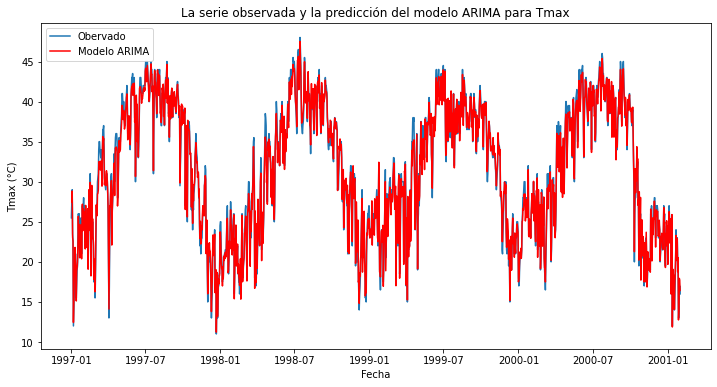

In [24]:
#Colocamos ambas gráficas para verificar.
predicciones_ARIMA = np.e**(predicciones_ARIMA_ln)
plt.rcParams['figure.figsize'] = (12,6)
plt.plot(Periodo_prueba, label='Obervado');
plt.plot(predicciones_ARIMA, label='Modelo ARIMA', color='red');
plt.xlabel('Fecha')
plt.ylabel('Tmax (°C)')
plt.title('La serie observada y la predicción del modelo ARIMA para Tmax')
plt.legend(loc='best')

In [25]:
#Calculando el ERROR. RMSE.
RMSE = np.sqrt(np.mean((predicciones_ARIMA - Periodo_prueba)**2))
print('RMSE:',RMSE)

RMSE: 0.9925044926357492


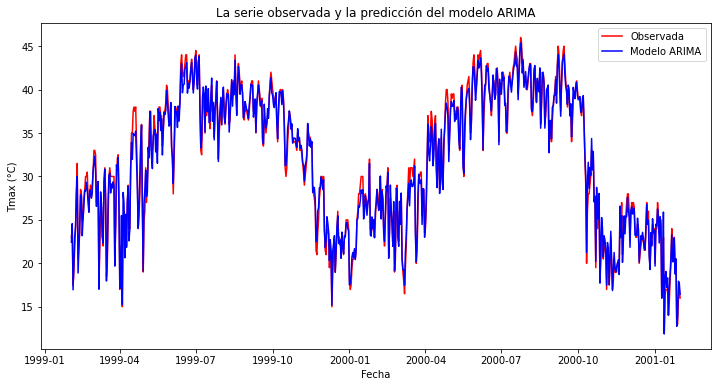

In [31]:
#Observamos con más detalle la aproximacion de la gráfica.
Periodo_prueba_final = Periodo_prueba.tail(730)
predicciones_ARIMA_final = predicciones_ARIMA.tail(730)
plt.plot(Periodo_prueba_final, label='Observada', color='red');
plt.plot(predicciones_ARIMA_final, label='Modelo ARIMA', color='blue');
plt.xlabel('Fecha')
plt.ylabel('Tmax (°C)')
plt.title('La serie observada y la predicción del modelo ARIMA')
plt.legend(loc='best');